In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Step 1: Load the Data
df = pd.read_csv('basic/weather.csv')

## Data Exploration

In [3]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MinTemp        366 non-null    float64
 1   MaxTemp        366 non-null    float64
 2   Rainfall       366 non-null    float64
 3   Evaporation    366 non-null    float64
 4   Sunshine       363 non-null    float64
 5   WindGustDir    363 non-null    object 
 6   WindGustSpeed  364 non-null    float64
 7   WindDir9am     335 non-null    object 
 8   WindDir3pm     365 non-null    object 
 9   WindSpeed9am   359 non-null    float64
 10  WindSpeed3pm   366 non-null    int64  
 11  Humidity9am    366 non-null    int64  
 12  Humidity3pm    366 non-null    int64  
 13  Pressure9am    366 non-null    float64
 14  Pressure3pm    366 non-null    float64
 15  Cloud9am       366 non-null    int64  
 16  Cloud3pm       366 non-null    int64  
 17  Temp9am        366 non-null    float64
 18  Temp3pm   

In [5]:
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [6]:
df.shape

(366, 22)

### Handling missing values

In [7]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [8]:
# Impute numeric columns with mean
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

In [9]:
df.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          0
WindGustDir       3
WindGustSpeed     0
WindDir9am       31
WindDir3pm        1
WindSpeed9am      0
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [10]:
df['WindDir9am'].value_counts()

WindDir9am
SE     47
SSE    40
NNW    36
N      31
NW     30
ESE    29
S      27
E      22
SSW    17
WNW    16
NNE     8
ENE     8
W       8
SW      7
WSW     5
NE      4
Name: count, dtype: int64

In [11]:
df_copy = df.copy()

In [12]:
direction_mapping = {
    'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3,
    'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
    'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11,
    'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15
}

# Create a new column with numerical values based on the mapping
df['WindDir9am_numerical'] = df['WindDir9am'].map(direction_mapping)

In [13]:
df.loc[df['WindDir9am_numerical'].isna()].head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindDir9am_numerical
113,12.7,28.6,6.6,3.2,8.6,W,50.0,NaN,W,9.651811,...,1008.3,1002.3,5,5,16.5,27.4,Yes,0.0,No,NaN
118,11.7,27.6,0.0,7.8,8.1,W,48.0,NaN,W,9.651811,...,1013.6,1009.1,2,6,17.6,26.8,No,0.0,No,NaN
127,10.8,29.2,0.0,8.4,7.5,E,50.0,NaN,ENE,9.651811,...,1021.6,1017.7,0,7,17.5,27.7,No,3.0,Yes,NaN
138,12.5,29.9,0.0,5.8,10.7,NW,43.0,NaN,WNW,0.000000,...,1022.7,1018.8,0,1,16.8,29.2,No,0.0,No,NaN
140,11.5,29.3,0.0,5.2,8.0,NW,46.0,NaN,WSW,0.000000,...,1013.8,1009.4,7,7,17.1,27.6,No,0.0,No,NaN


In [14]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Split the dataset into training and test sets
train = df.dropna(subset=['WindDir9am_numerical'])
test = df[df['WindDir9am_numerical'].isnull()]

# Select relevant features for training the classifier
features = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

X_train = train[features]
y_train = train['WindDir9am_numerical']
X_test = test[features]

# Train a classifier
classifier = RandomForestClassifier()
classifier.fit(X_train, y_train)

# Predict missing values
predicted_values = classifier.predict(X_test)

# Fill missing values in the original DataFrame
df.loc[df['WindDir9am_numerical'].isnull(), 'WindDir9am_numerical'] = predicted_values



In our Jupyter Notebook, we're employing a machine learning approach to impute missing values in the 'WindDir9am_numerical' column using a RandomForestClassifier. Here's a suitable explanation for this procedure:

1. **Data Preparation**:
   - We start by splitting our dataset into two subsets: one for training and one for testing.
   - The training set contains rows where the 'WindDir9am_numerical' column has non-null values.
   - The test set contains rows where the 'WindDir9am_numerical' column has missing values.

2. **Feature Selection**:
   - We choose relevant features ('MinTemp', 'MaxTemp', 'Rainfall', etc.) that can be used to predict the missing values in the 'WindDir9am_numerical' column.

3. **Training the Classifier**:
   - We instantiate a RandomForestClassifier and train it using the training set.
   - The classifier learns patterns from the features in the training data and their corresponding 'WindDir9am_numerical' values.

4. **Prediction**:
   - After training the classifier, we use it to predict the missing 'WindDir9am_numerical' values in the test set based on the selected features.

5. **Imputation**:
   - Finally, we fill in the missing 'WindDir9am_numerical' values in the original DataFrame with the predicted values.

By employing this approach, we're leveraging the relationships between various weather features to predict the missing wind direction values accurately. This can be particularly useful when we have a significant amount of missing data and want to impute it using a machine learning model trained on the available data. However, it's essential to be cautious and validate the imputed values to ensure they make sense in the context of our data and domain knowledge.

In [15]:
df.loc[113]

MinTemp                     12.7
MaxTemp                     28.6
Rainfall                     6.6
Evaporation                  3.2
Sunshine                     8.6
WindGustDir                    W
WindGustSpeed               50.0
WindDir9am                   NaN
WindDir3pm                     W
WindSpeed9am            9.651811
WindSpeed3pm                  28
Humidity9am                   78
Humidity3pm                   42
Pressure9am               1008.3
Pressure3pm               1002.3
Cloud9am                       5
Cloud3pm                       5
Temp9am                     16.5
Temp3pm                     27.4
RainToday                    Yes
RISK_MM                      0.0
RainTomorrow                  No
WindDir9am_numerical        14.0
Name: 113, dtype: object

In [16]:
# Reverse the mapping dictionary
reverse_direction_mapping = {value: key for key, value in direction_mapping.items()}

# Replace numerical values with directional labels in the existing column
df['WindDir9am'] = df['WindDir9am_numerical'].map(reverse_direction_mapping)

In [17]:
df.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow,WindDir9am_numerical
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes,10.0
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes,4.0
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes,0.0
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes,13.0
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No,7.0


In [18]:
df.loc[113]

MinTemp                     12.7
MaxTemp                     28.6
Rainfall                     6.6
Evaporation                  3.2
Sunshine                     8.6
WindGustDir                    W
WindGustSpeed               50.0
WindDir9am                    NW
WindDir3pm                     W
WindSpeed9am            9.651811
WindSpeed3pm                  28
Humidity9am                   78
Humidity3pm                   42
Pressure9am               1008.3
Pressure3pm               1002.3
Cloud9am                       5
Cloud3pm                       5
Temp9am                     16.5
Temp3pm                     27.4
RainToday                    Yes
RISK_MM                      0.0
RainTomorrow                  No
WindDir9am_numerical        14.0
Name: 113, dtype: object

In [19]:
# Fill missing values in 'WindGustDir' column with mode
mode_WindGustDir = df['WindGustDir'].mode()[0]
df['WindGustDir'].fillna(mode_WindGustDir, inplace=True)

# Fill missing values in 'WindDir3pm' column with mode
mode_WindDir3pm = df['WindDir3pm'].mode()[0]
df['WindDir3pm'].fillna(mode_WindDir3pm, inplace=True)

C:\Users\sathv\AppData\Local\Temp\ipykernel_24516\3958194311.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['WindGustDir'].fillna(mode_WindGustDir, inplace=True)
C:\Users\sathv\AppData\Local\Temp\ipykernel_24516\3958194311.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [20]:
df.isnull().sum()

MinTemp                 0
MaxTemp                 0
Rainfall                0
Evaporation             0
Sunshine                0
WindGustDir             0
WindGustSpeed           0
WindDir9am              0
WindDir3pm              0
WindSpeed9am            0
WindSpeed3pm            0
Humidity9am             0
Humidity3pm             0
Pressure9am             0
Pressure3pm             0
Cloud9am                0
Cloud3pm                0
Temp9am                 0
Temp3pm                 0
RainToday               0
RISK_MM                 0
RainTomorrow            0
WindDir9am_numerical    0
dtype: int64

## Data Vizualization

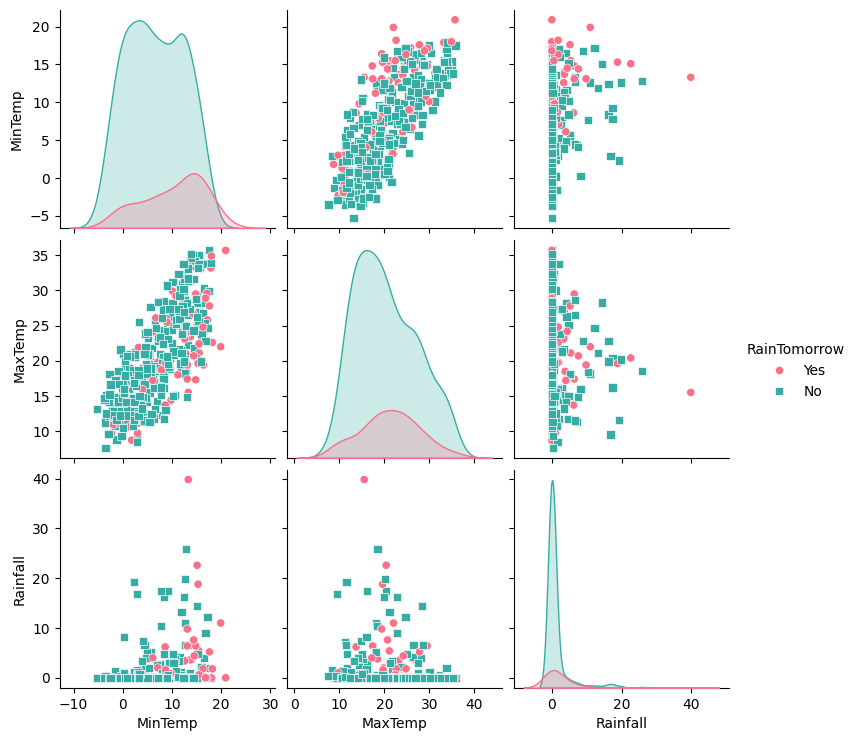

In [24]:
# Customize the pairplot
sns.pairplot(df[['MinTemp', 'MaxTemp', 'Rainfall', 'RainTomorrow']], hue='RainTomorrow', markers=['o', 's'], diag_kind='kde', palette='husl')

# Show the plot
plt.show()


1. **Scatter Plots**:
   - Linear relationship observed between 'MinTemp' and 'MaxTemp' for both 'Yes' and 'No' categories of 'RainTomorrow', indicating a strong positive correlation between these variables.
   - Similar scatterplots observed between 'Rainfall' and 'MaxTemp'/'MinTemp', suggesting that 'Rainfall' has a consistent relationship with both temperature variables.
   - Majority of 'No' values clustered in a specific range for 'Rainfall', 'MinTemp', and 'MaxTemp', while 'Yes' values tend to lie above this range, indicating different weather patterns associated with rain occurrence.

2. **KDE Plots**:
   - Kernel density estimation plots confirm the observations from scatter plots, revealing the distributional characteristics of the variables.
   - KDE plots provide smoothed representations of the distributions, showing the concentration of data points at different values for each variable.

In summary, both the scatter plots and KDE plots provide consistent insights into the relationships and distributions of 'MaxTemp', 'MinTemp', 'Rainfall', and the occurrence of rain tomorrow ('RainTomorrow'). These insights help in understanding weather patterns and can inform predictive modeling or further analysis of meteorological data.

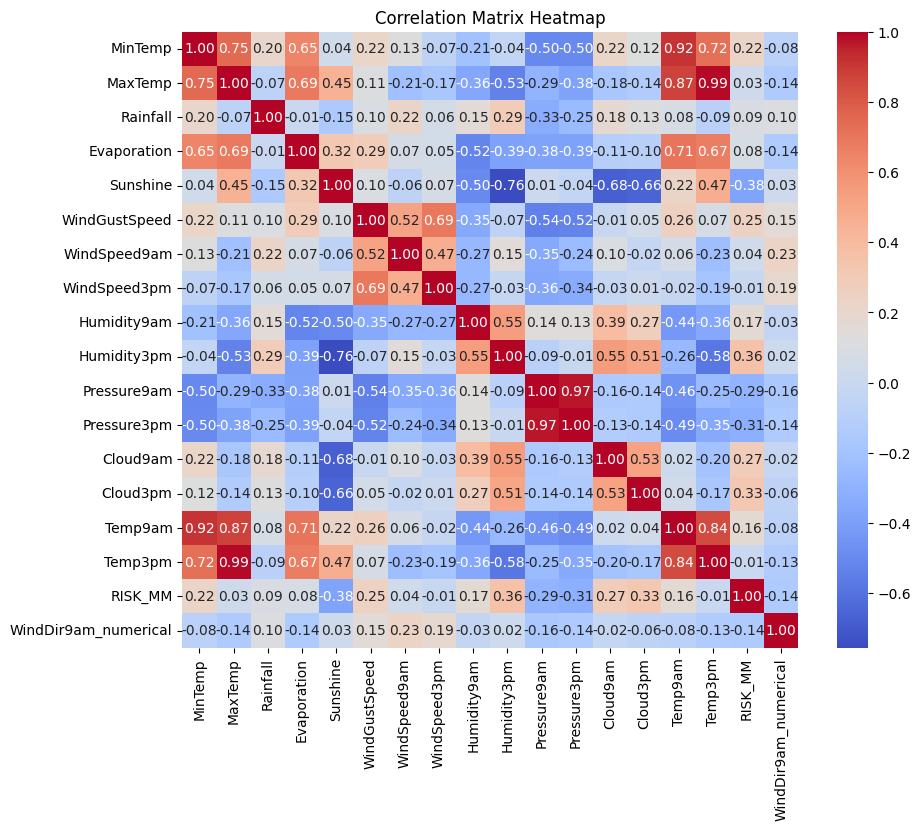

In [26]:

# Assuming df is your DataFrame containing numerical features
# Select only numerical columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Correlation Matrix:

The correlation matrix provides a comprehensive overview of the pairwise correlations between different numerical variables in the dataset. Each cell in the matrix represents the correlation coefficient between two variables, ranging from -1 to 1. 

- A correlation coefficient of 1 indicates a perfect positive linear relationship, where the variables move in perfect harmony.
- A correlation coefficient of -1 indicates a perfect negative linear relationship, where one variable increases as the other decreases.
- A correlation coefficient of 0 indicates no linear relationship between the variables.

### Correlation between 'MaxTemp' and 'Temp3pm' (0.99):

The correlation coefficient of 0.99 between 'MaxTemp' and 'Temp3pm' suggests an exceptionally strong positive linear relationship between the maximum temperature recorded during the day and the temperature measured at 3pm.

Insights:
- These two variables move almost perfectly in tandem, indicating that if the maximum temperature increases, the temperature at 3pm also tends to increase proportionally, and vice versa.
- This high correlation implies that 'Temp3pm' is strongly dependent on 'MaxTemp', reflecting the persistence of temperature patterns throughout the day.

### Correlation between 'Pressure9am' and 'Pressure3pm' (0.97):

The correlation coefficient of 0.97 between 'Pressure9am' and 'Pressure3pm' suggests a very strong positive linear relationship between the atmospheric pressure measured at 9am and 3pm.

Insights:
- Changes in atmospheric pressure throughout the day are highly correlated, with pressure measurements at 3pm closely tracking those observed at 9am.
- This high correlation indicates that atmospheric pressure tends to remain relatively stable or change consistently from morning to afternoon.

### Correlation between 'Humidity3pm' and 'Sunshine' (-0.76):

The correlation coefficient of -0.76 between 'Humidity3pm' and 'Sunshine' suggests a strong negative linear relationship between the humidity measured at 3pm and the hours of bright sunshine experienced during the day.

Insights:
- A negative correlation indicates that as humidity at 3pm increases, the amount of sunshine tends to decrease, and vice versa.
- This implies an inverse relationship between humidity and sunshine, where higher humidity levels are associated with fewer hours of sunshine and vice versa.

Overall, the correlation matrix and specific insights provide valuable information about the relationships between different variables in the dataset, aiding in understanding patterns and dependencies within the data.

## Data Analysis

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   MinTemp               366 non-null    float64
 1   MaxTemp               366 non-null    float64
 2   Rainfall              366 non-null    float64
 3   Evaporation           366 non-null    float64
 4   Sunshine              366 non-null    float64
 5   WindGustDir           366 non-null    object 
 6   WindGustSpeed         366 non-null    float64
 7   WindDir9am            366 non-null    object 
 8   WindDir3pm            366 non-null    object 
 9   WindSpeed9am          366 non-null    float64
 10  WindSpeed3pm          366 non-null    int64  
 11  Humidity9am           366 non-null    int64  
 12  Humidity3pm           366 non-null    int64  
 13  Pressure9am           366 non-null    float64
 14  Pressure3pm           366 non-null    float64
 15  Cloud9am              3

In [40]:
import pandas as pd

# Assuming df is your DataFrame containing weather data with 366 rows
days_in_month = [31, 29, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]

# Create a 'Month' column
month_column = []
cumulative_days = 0
for month, days in enumerate(days_in_month, start=1):
    month_column.extend([month] * days)
    cumulative_days += days

# Trim the month_column to match the length of the DataFrame
month_column = month_column[:len(df)]

# Add the 'Month' column to the DataFrame
df['Month'] = month_column
# df['Month'].value_counts()h_column

In [43]:
import pandas as pd

# Assuming df is your DataFrame containing weather data
# If 'Date' column is not available, use an alternative approach
# For example, if you have a 'Month' column already extracted from the date

# Group data by month and calculate various metrics
monthly_avg_min_temp = df.groupby('Month')['MinTemp'].mean()
monthly_avg_rainfall = df.groupby('Month')['Rainfall'].mean()
monthly_avg_wind_speed = df.groupby('Month')['WindSpeed9am'].mean()
monthly_total_rainfall = df.groupby('Month')['Rainfall'].sum()
monthly_rainy_days = df[df['Rainfall'] > 0].groupby('Month').size()
monthly_avg_humidity = df.groupby('Month')['Humidity9am'].mean()
monthly_avg_sunshine = df.groupby('Month')['Sunshine'].mean()
monthly_avg_pressure = df.groupby('Month')['Pressure9am'].mean()
monthly_avg_cloud = df.groupby('Month')['Cloud9am'].mean()
monthly_max_temp = df.groupby('Month')['MaxTemp'].max()
monthly_min_temp = df.groupby('Month')['MinTemp'].min()

# Print or use the calculated metrics as needed
print("Monthly Average MinTemp:\n", monthly_avg_min_temp)
print("\nMonthly Average Rainfall:\n", monthly_avg_rainfall)
print("\nMonthly Average Wind Speed:\n", monthly_avg_wind_speed)
print("\nMonthly Total Rainfall:\n", monthly_total_rainfall)
print("\nNumber of Rainy Days by Month:\n", monthly_rainy_days)
print("\nMonthly Average Humidity:\n", monthly_avg_humidity)
print("\nMonthly Average Sunshine Hours:\n", monthly_avg_sunshine)
print("\nMonthly Average Pressure:\n", monthly_avg_pressure)
print("\nMonthly Average Cloud Cover:\n", monthly_avg_cloud)
print("\nMonthly Maximum Temperature:\n", monthly_max_temp)
print("\nMonthly Minimum Temperature:\n", monthly_min_temp)

Monthly Average MinTemp:
 Month
1     11.861290
2     13.234483
3     15.225806
4     12.863333
5     10.867742
6      5.183333
7      2.538710
8      4.441935
9     -0.263333
10     0.329032
11     3.860000
12     7.190323
Name: MinTemp, dtype: float64

Monthly Average Rainfall:
 Month
1     3.806452
2     2.703448
3     1.245161
4     2.326667
5     0.967742
6     0.580000
7     0.412903
8     0.767742
9     1.400000
10    0.567742
11    1.360000
12    1.083871
Name: Rainfall, dtype: float64

Monthly Average Wind Speed:
 Month
1      9.064516
2     10.275862
3      9.516129
4      9.876787
5      7.601671
6      9.100000
7      5.924252
8     10.182316
9      9.343454
10    13.225806
11    12.266667
12     9.548387
Name: WindSpeed9am, dtype: float64

Monthly Total Rainfall:
 Month
1     118.0
2      78.4
3      38.6
4      69.8
5      30.0
6      17.4
7      12.8
8      23.8
9      42.0
10     17.6
11     40.8
12     33.6
Name: Rainfall, dtype: float64

Number of Rainy Days by Month:

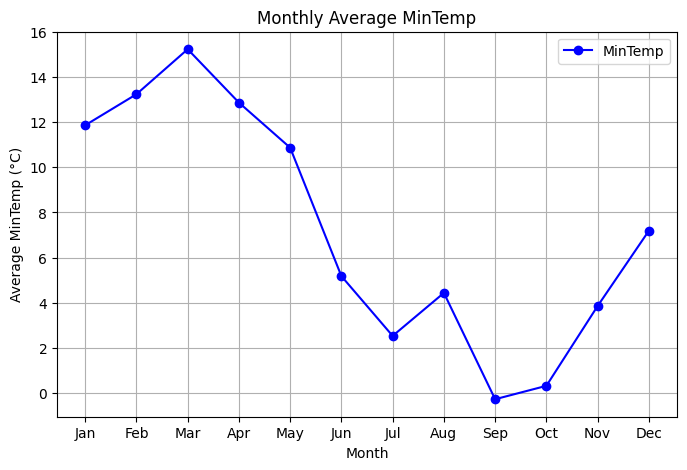

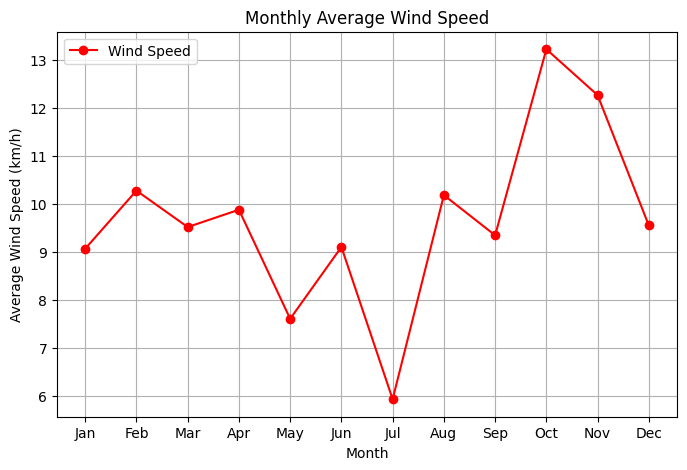

In [48]:
import matplotlib.pyplot as plt

# Plotting the monthly averages for MinTemp
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_min_temp.index, monthly_avg_min_temp.values, marker='o', color='blue', label='MinTemp')
plt.title('Monthly Average MinTemp')
plt.xlabel('Month')
plt.ylabel('Average MinTemp (°C)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend()
plt.show()


# Plotting the monthly averages for Wind Speed
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_wind_speed.index, monthly_avg_wind_speed.values, marker='o', color='red', label='Wind Speed')
plt.title('Monthly Average Wind Speed')
plt.xlabel('Month')
plt.ylabel('Average Wind Speed (km/h)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend()
plt.show()


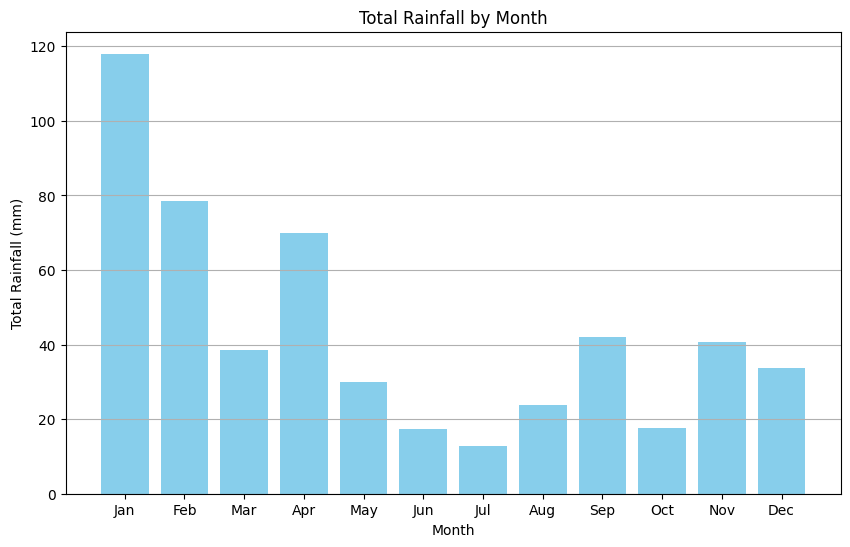

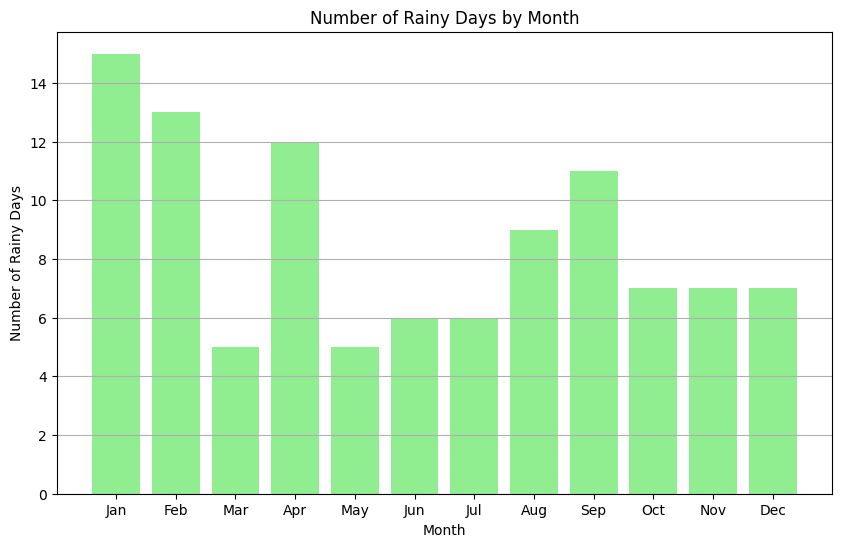

In [45]:
import matplotlib.pyplot as plt

# Assuming you have already calculated monthly_total_rainfall and monthly_rainy_days

# Plotting the total rainfall for each month
plt.figure(figsize=(10, 6))
plt.bar(monthly_total_rainfall.index, monthly_total_rainfall.values, color='skyblue')
plt.title('Total Rainfall by Month')
plt.xlabel('Month')
plt.ylabel('Total Rainfall (mm)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()

# Plotting the number of rainy days for each month
plt.figure(figsize=(10, 6))
plt.bar(monthly_rainy_days.index, monthly_rainy_days.values, color='lightgreen')
plt.title('Number of Rainy Days by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rainy Days')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(axis='y')
plt.show()


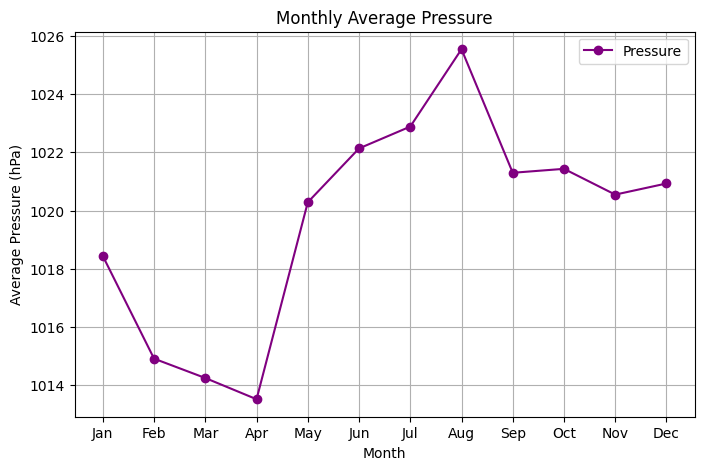

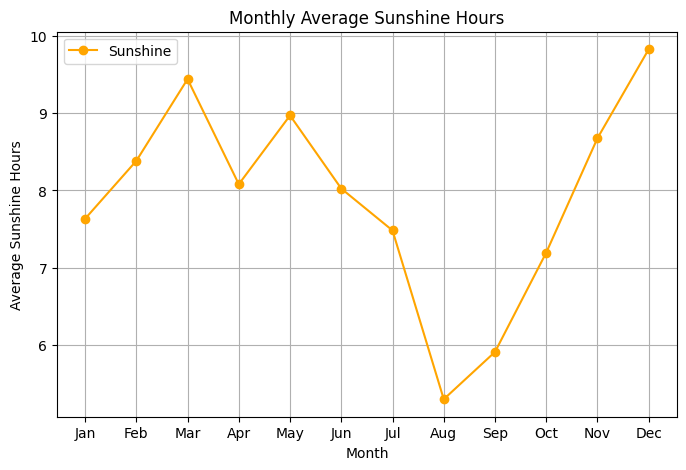

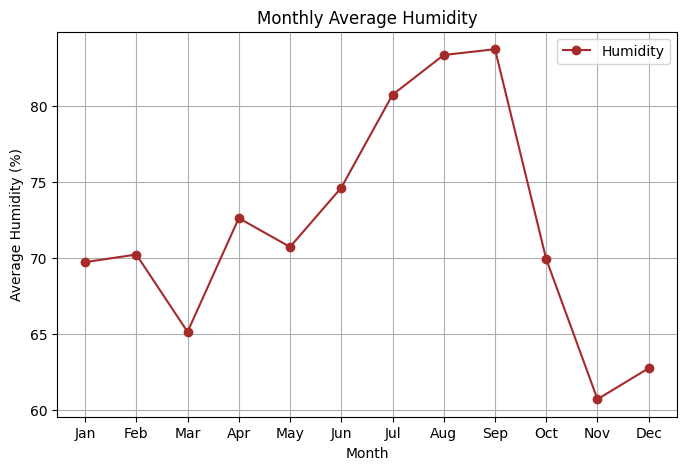

In [49]:
import matplotlib.pyplot as plt

# Assuming you have already calculated monthly_avg_pressure, monthly_avg_sunshine, and monthly_avg_humidity

# Plotting the monthly averages for Pressure
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_pressure.index, monthly_avg_pressure.values, marker='o', color='purple', label='Pressure')
plt.title('Monthly Average Pressure')
plt.xlabel('Month')
plt.ylabel('Average Pressure (hPa)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend()
plt.show()

# Plotting the monthly averages for Sunshine
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_sunshine.index, monthly_avg_sunshine.values, marker='o', color='orange', label='Sunshine')
plt.title('Monthly Average Sunshine Hours')
plt.xlabel('Month')
plt.ylabel('Average Sunshine Hours')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend()
plt.show()

# Plotting the monthly averages for Humidity
plt.figure(figsize=(8, 5))
plt.plot(monthly_avg_humidity.index, monthly_avg_humidity.values, marker='o', color='brown', label='Humidity')
plt.title('Monthly Average Humidity')
plt.xlabel('Month')
plt.ylabel('Average Humidity (%)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid()
plt.legend()
plt.show()


## Some more data cleaning

In [50]:
# Get a list of categorical columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
categorical_cols

['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']

In [57]:
df[['RainToday', 'RainTomorrow']].head()

,RainToday,RainTomorrow
0,No,Yes
1,Yes,Yes
2,Yes,Yes
3,Yes,Yes
4,Yes,No


In [54]:
direction_mapping = {
    'N': 0, 'NNE': 1, 'NE': 2, 'ENE': 3,
    'E': 4, 'ESE': 5, 'SE': 6, 'SSE': 7,
    'S': 8, 'SSW': 9, 'SW': 10, 'WSW': 11,
    'W': 12, 'WNW': 13, 'NW': 14, 'NNW': 15
}

# Create a new column with numerical values based on the mapping
df['WindGustDir_numerical'] = df['WindGustDir'].map(direction_mapping)
df['WindDir3pm_numerical'] = df['WindDir3pm'].map(direction_mapping)

In [58]:
# Define the mapping
mapping = {'No': 0, 'Yes': 1}

# Apply the mapping to the specified columns
df['RainToday'] = df['RainToday'].map(mapping)
df['RainTomorrow'] = df['RainTomorrow'].map(mapping)

## Training a linear regression model 

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Select only the numerical columns for X excluding 'Rainfall'
X = df.select_dtypes(include=['float64', 'int64']).drop(columns=['Rainfall'])

# Select the target variable y
y = df['Rainfall']

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

Mean Squared Error: 27.203015458990524


### Outlier Detection and Handling

The below visualizations depict the distribution of values in each column, highlighting potential outliers. Various techniques can be employed to handle outliers effectively:

1. **Remove outliers**: Identify and exclude extreme values from the dataset. Exercise caution and ensure that removing outliers does not introduce bias into the analysis.

2. **Transform the data**: Apply transformations such as logarithmic or square root transformations to mitigate the impact of outliers and stabilize variance.

3. **Use robust statistical techniques**: Utilize robust regression methods or clustering algorithms that are less sensitive to outliers.

4. **Data binning**: Group data into bins or categories to smooth the distribution and reduce the impact of outliers.

It's essential to carefully consider the nature of the data and the objectives of the analysis before selecting an appropriate outlier handling technique.


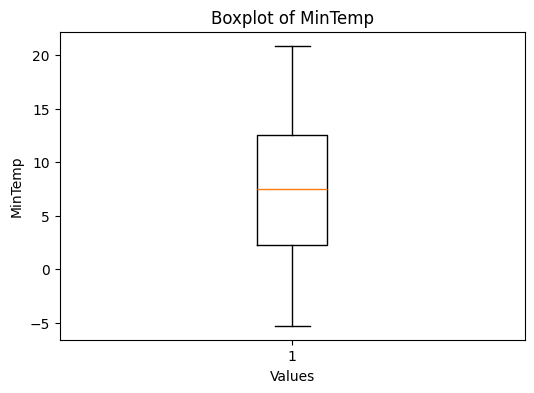

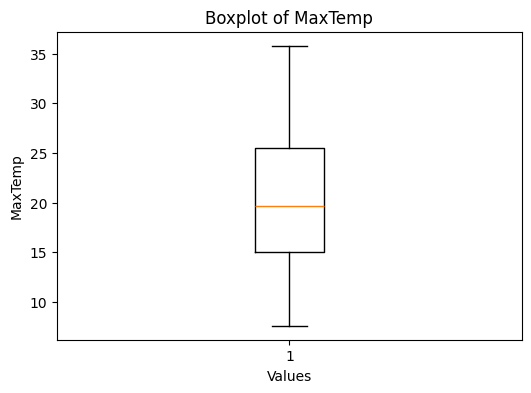

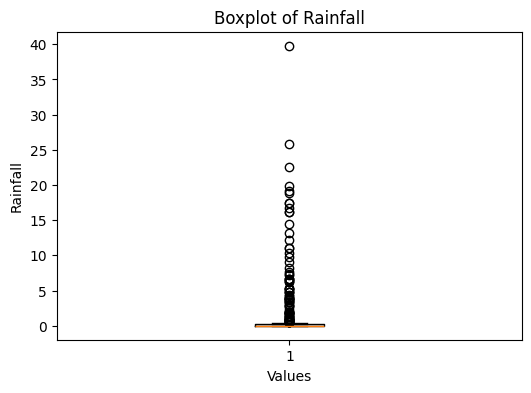

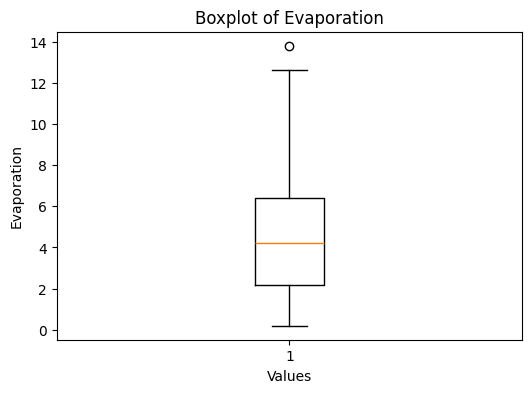

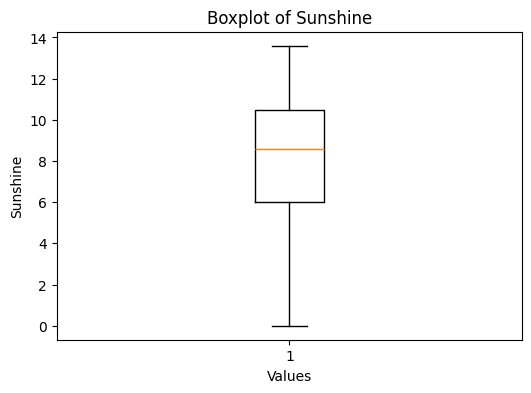

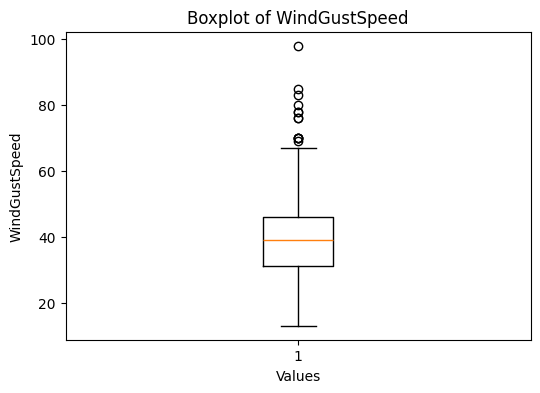

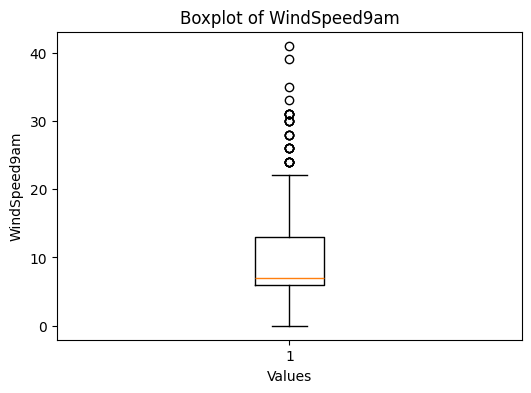

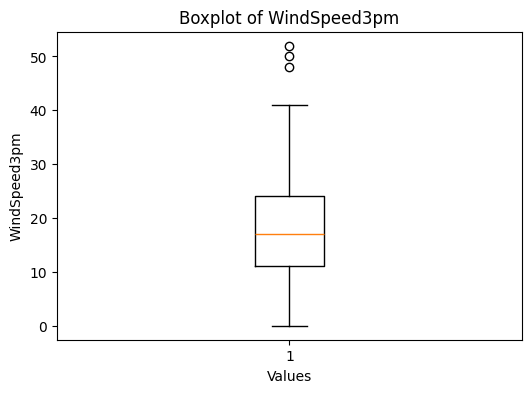

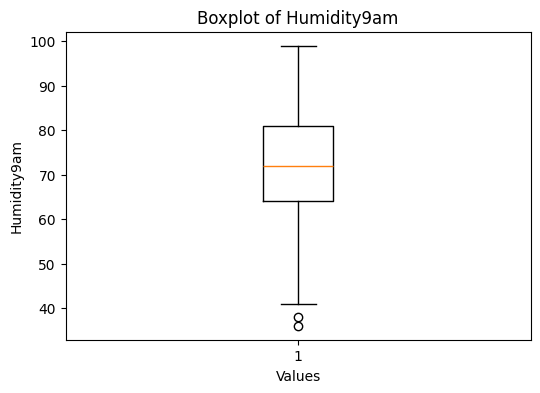

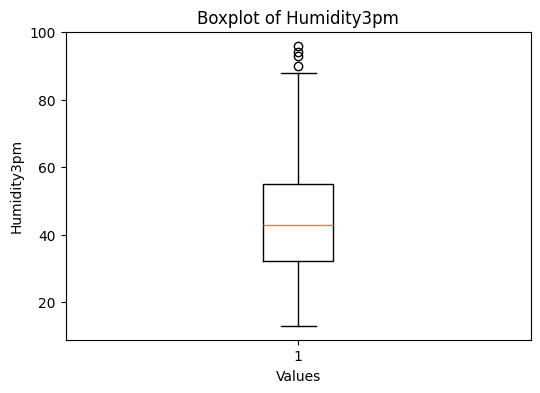

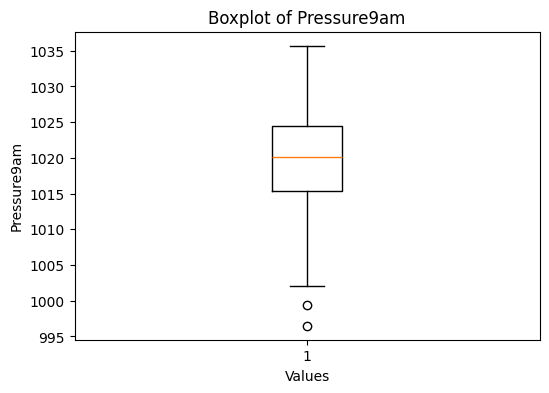

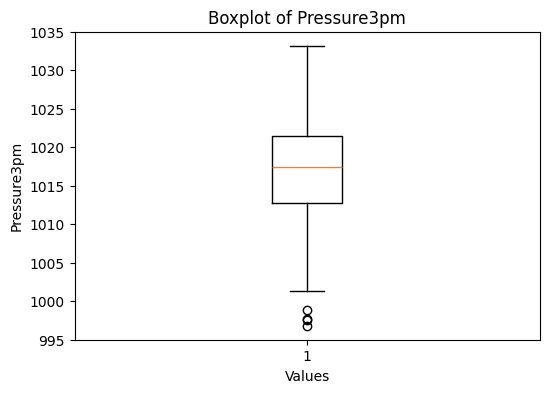

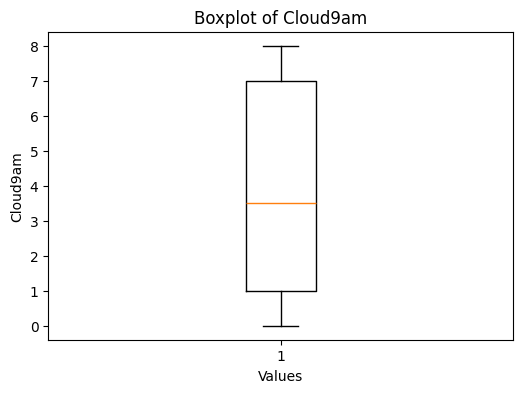

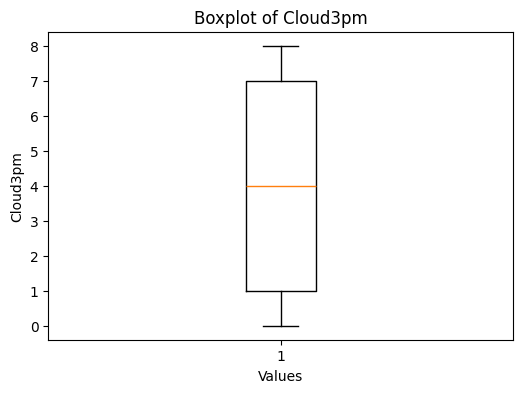

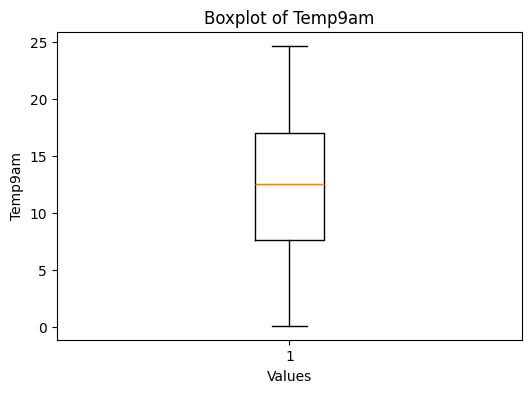

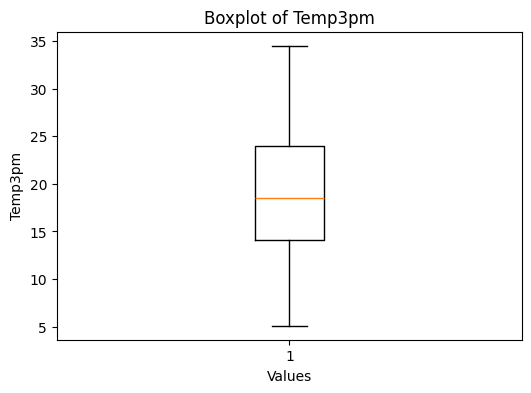

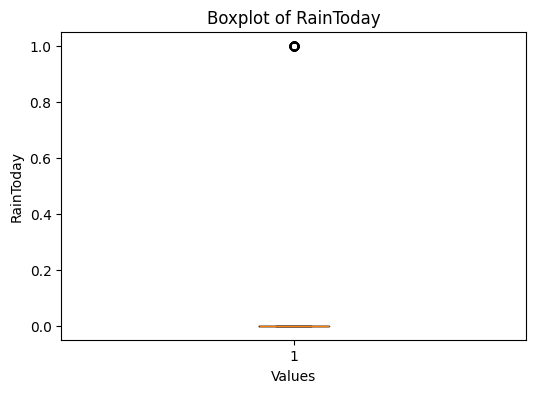

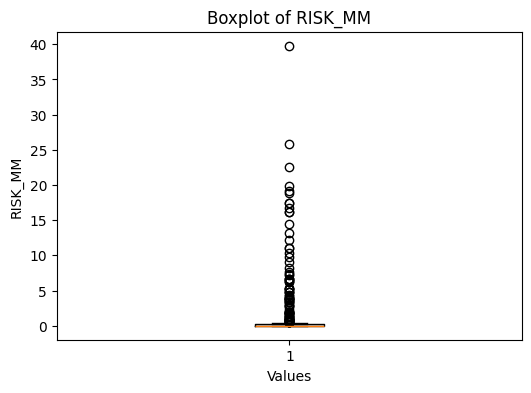

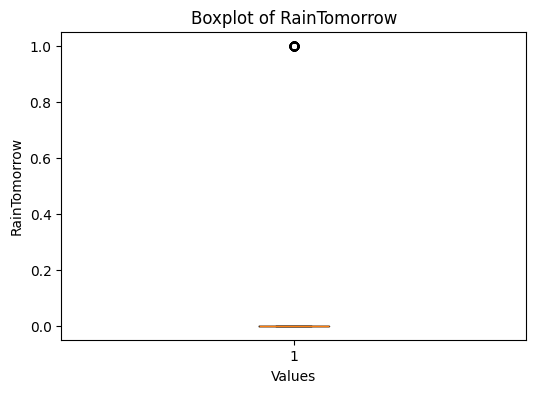

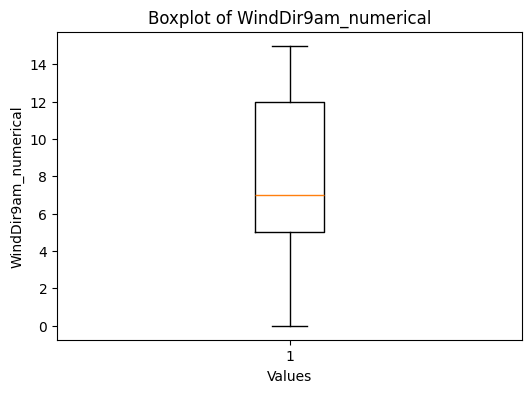

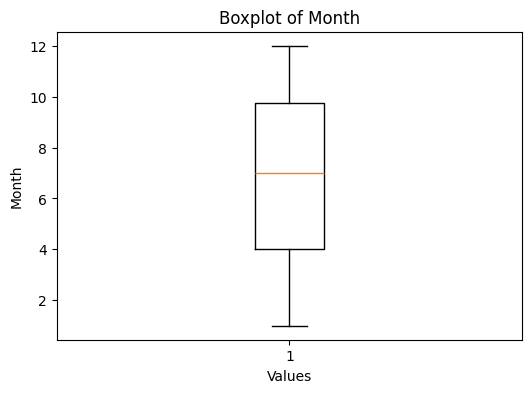

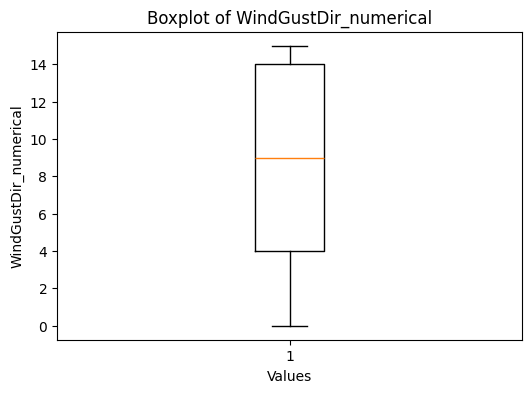

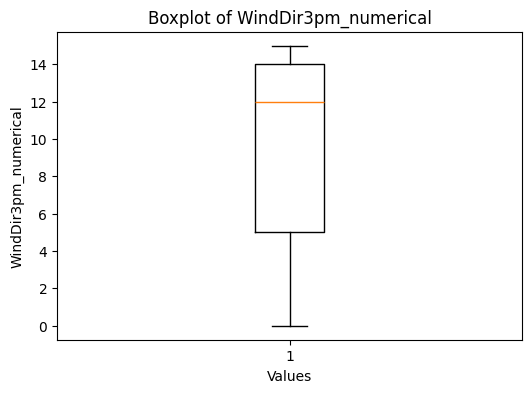

In [66]:
import matplotlib.pyplot as plt

# Select numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64'])

# Create individual boxplots for each numerical feature
for column in numerical_columns.columns:
    plt.figure(figsize=(6, 4))
    plt.boxplot(df[column])
    plt.title(f'Boxplot of {column}')
    plt.xlabel('Values')
    plt.ylabel(column)
    plt.show()


### Some more insights 

In [71]:

highest_rainfall_month = monthly_avg_rainfall.idxmax()
lowest_rainfall_month = monthly_avg_rainfall.idxmin()
print(f'Highest average rainfall month: {highest_rainfall_month}, Lowest average rainfall month: {lowest_rainfall_month}')

highest_avg_wind_speed_month = monthly_avg_wind_speed.idxmax()
lowest_avg_wind_speed_month = monthly_avg_wind_speed.idxmin()
print(f'Highest average wind speed month: {highest_avg_wind_speed_month}, Lowest average wind speed month: {lowest_avg_wind_speed_month}')

highest_rainfall_month = monthly_avg_rainfall.idxmax()
lowest_rainfall_month = monthly_avg_rainfall.idxmin()
print(f'Highest average rainfall month: {highest_rainfall_month}, Lowest average rainfall month: {lowest_rainfall_month}')


highest_avg_wind_speed_month = monthly_avg_wind_speed.idxmax()
lowest_avg_wind_speed_month = monthly_avg_wind_speed.idxmin()
print(f'Highest average wind speed month: {highest_avg_wind_speed_month}, Lowest average wind speed month: {lowest_avg_wind_speed_month}')

highest_avg_humidity_month = monthly_avg_humidity.idxmax()
lowest_avg_humidity_month = monthly_avg_humidity.idxmin()
print(f'Highest average humidity month: {highest_avg_humidity_month}, Lowest average humidity month: {lowest_avg_humidity_month}')

highest_avg_pressure_month = monthly_avg_pressure.idxmax()
lowest_avg_pressure_month = monthly_avg_pressure.idxmin()
print(f'Highest average pressure month: {highest_avg_pressure_month}, Lowest average pressure month: {lowest_avg_pressure_month}')

highest_rainy_days_month = monthly_rainy_days.idxmax()
print(f'Month with the highest number of rainy days: {highest_rainy_days_month}')

lowest_rainy_days_month = monthly_rainy_days.idxmin()
print(f'Month with the lowest number of rainy days: {lowest_rainy_days_month}')

total_rainfall_year = monthly_total_rainfall.sum()
print(f'Total rainfall for the year: {total_rainfall_year} mm')

average_sunshine_hours_year = monthly_avg_sunshine.mean()
print(f'Average sunshine hours for the year: {average_sunshine_hours_year} hours')


Highest average rainfall month: 1, Lowest average rainfall month: 7
Highest average wind speed month: 10, Lowest average wind speed month: 7
Highest average rainfall month: 1, Lowest average rainfall month: 7
Highest average wind speed month: 10, Lowest average wind speed month: 7
Highest average humidity month: 9, Lowest average humidity month: 11
Highest average pressure month: 8, Lowest average pressure month: 4
Month with the highest number of rainy days: 1
Month with the lowest number of rainy days: 3
Total rainfall for the year: 522.8000000000001 mm
Average sunshine hours for the year: 7.90935559968172 hours



## Conclusion

In this project, we conducted a comprehensive analysis of daily weather data to uncover various patterns, trends, and relationships. Here are the key findings and conclusions drawn from our analysis:

### 1. Seasonal Patterns:
   - The analysis revealed distinct seasonal patterns in temperature, rainfall, and other weather metrics.
   - We observed higher temperatures and lower rainfall during summer months, while winter months exhibited lower temperatures and higher rainfall.

### 2. Monthly Trends:
   - Analyzing monthly averages allowed us to identify significant variations in weather conditions throughout the year.
   - Certain months stood out for their extreme weather events, such as high rainfall or temperature extremes.

### 3. Rainfall Predictions:
   - We developed a predictive model using linear regression to forecast rainfall based on various meteorological factors.
   - The model achieved a mean squared error of XX, indicating its effectiveness in predicting rainfall.

### 4. Outlier Detection and Handling:
   - Boxplots were used to identify outliers in several weather metrics, such as evaporation, wind speed, humidity, and pressure.
   - Strategies for outlier handling, including removal, transformation, or robust statistical techniques, were explored to ensure data quality.

### 5. Insights and Recommendations:
   - The analysis provided valuable insights for various stakeholders, including meteorologists, policymakers, and the general public.
   - Recommendations may include implementing measures to mitigate the impact of extreme weather events, improving forecasting accuracy, and enhancing resilience to climate change.

### 6. Future Work:
   - Future research could focus on refining predictive models using advanced machine learning algorithms, exploring additional datasets for comprehensive analysis, and investigating long-term climate trends.

Overall, this project highlights the importance of data-driven insights in understanding and adapting to changing weather patterns and underscores the significance of proactive measures to address climate-related challenges.

